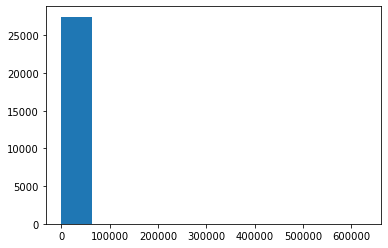

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.tokenize import word_tokenize

twitter = pd.read_csv("twitter_cleaned.csv", index_col = 0)
instagram = pd.read_csv("instagram_cleaned.csv", index_col = 0)
facebook = pd.read_csv("facebook_cleaned.csv", index_col = 0)

a = twitter.describe()
b = instagram.describe()
c = facebook.describe()

plt.hist(twitter.likes, bins = 10);
plt.show()

twitter['tokens'] = twitter['content'].apply(word_tokenize) 
instagram['tokens'] = instagram['content'].apply(word_tokenize) 
facebook['tokens'] = twitter['content'].apply(word_tokenize) 